 # 【問題1】データの取得
 
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
X = iris_data['data']
y = iris_data['target']

 # 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [7]:
import pandas as pd
import numpy as np

In [8]:
columns = iris_data['feature_names']

In [9]:
df = pd.DataFrame(X, columns=columns)

In [10]:
df['target'] = y

In [11]:
#pd.concat([X,y], axis=1)でもいける

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


 # 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [13]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [14]:
df.sum()

sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
target               150.0
dtype: float64

In [15]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


 # 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


 # 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

sepal_widthの列を３つの異なる方法で抽出する

50番目から99番目までのデータを抽出する

petal_lengthの列の50番目から99番目までのデータを抽出する

petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [18]:
df['sepal width (cm)'][50:100]

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    2.5
90    2.6
91    3.0
92    2.6
93    2.3
94    2.7
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal width (cm), dtype: float64

In [19]:
df[df['petal width (cm)']==0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [20]:
#locはインデックス名およびコラム名を指定
print(df.loc[10,  "sepal width (cm)"])
#ilocはインデックスを指定
print(df.iloc[10, 1])

3.7
3.7


 # 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

・ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

・特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

・特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

・箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

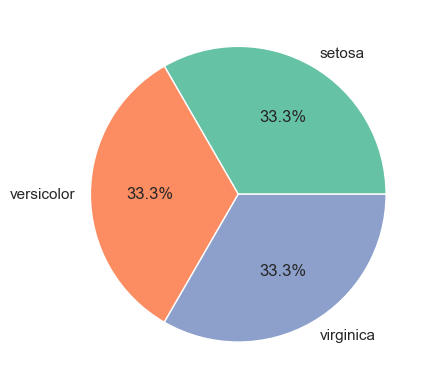

In [21]:
#ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

x = ["setosa", "versicolor", "virginica"]
y = np.bincount(df["target"])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(y, labels=x, autopct="%1.1f%%", )

plt.show()

In [22]:
print(iris_data['target_names'])
print(np.unique(iris_data['target']))

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [23]:
sepal_length = df["sepal length (cm)"].values
sepal_width = df["sepal width (cm)"].values

x1 = df[df["target"]==0]["sepal length (cm)"].values
x2 = df[df["target"]==1]["sepal length (cm)"].values
x3 = df[df["target"]==2]["sepal length (cm)"].values
y1 = df[df["target"]==0]["sepal width (cm)"].values
y2 = df[df["target"]==1]["sepal width (cm)"].values
y3 = df[df["target"]==2]["sepal width (cm)"].values

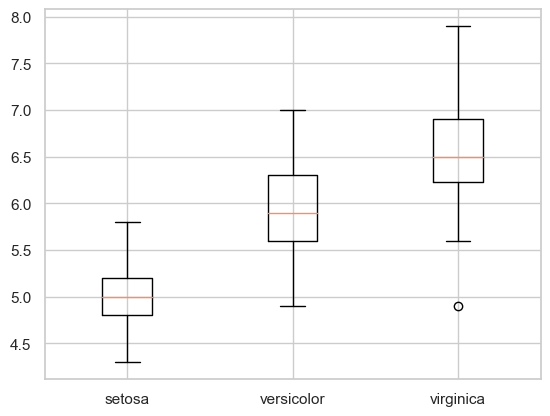

In [24]:
#特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

points = (x1, x2, x3)
fig, ax = plt.subplots()
bp = ax.boxplot(points)
ax.set_xticklabels(['setosa', 'versicolor', 'virginica'])

plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x123bc0310>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x123bc0b50>,
 'cmins': <matplotlib.collections.LineCollection at 0x123bdf250>,
 'cbars': <matplotlib.collections.LineCollection at 0x123bc0210>,
 'cmedians': <matplotlib.collections.LineCollection at 0x123bdf810>}

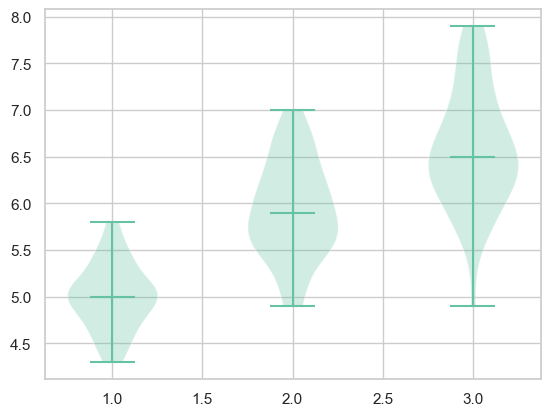

In [25]:
#特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
plt.violinplot([x1, x2, x3], showmedians=True)

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

 # 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

・縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

・全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

・４つの特徴量に関する相関係数行列を作る

・相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

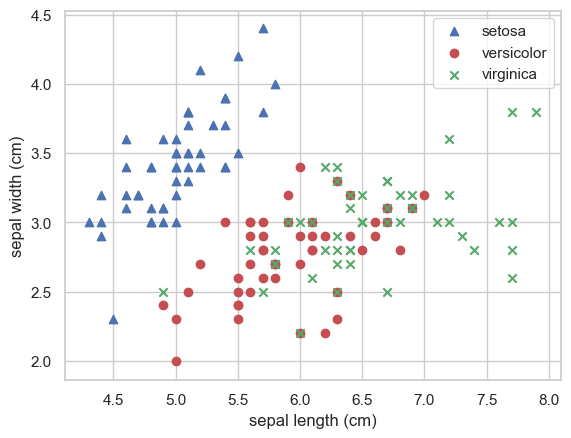

In [24]:
#縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
plt.scatter(x1, y1, marker="^", color="b", label="setosa")
plt.scatter(x2, y2, marker="o", color="r", label="versicolor")
plt.scatter(x3, y3, marker="x", color="g", label="virginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend(loc="best")
plt.show()

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


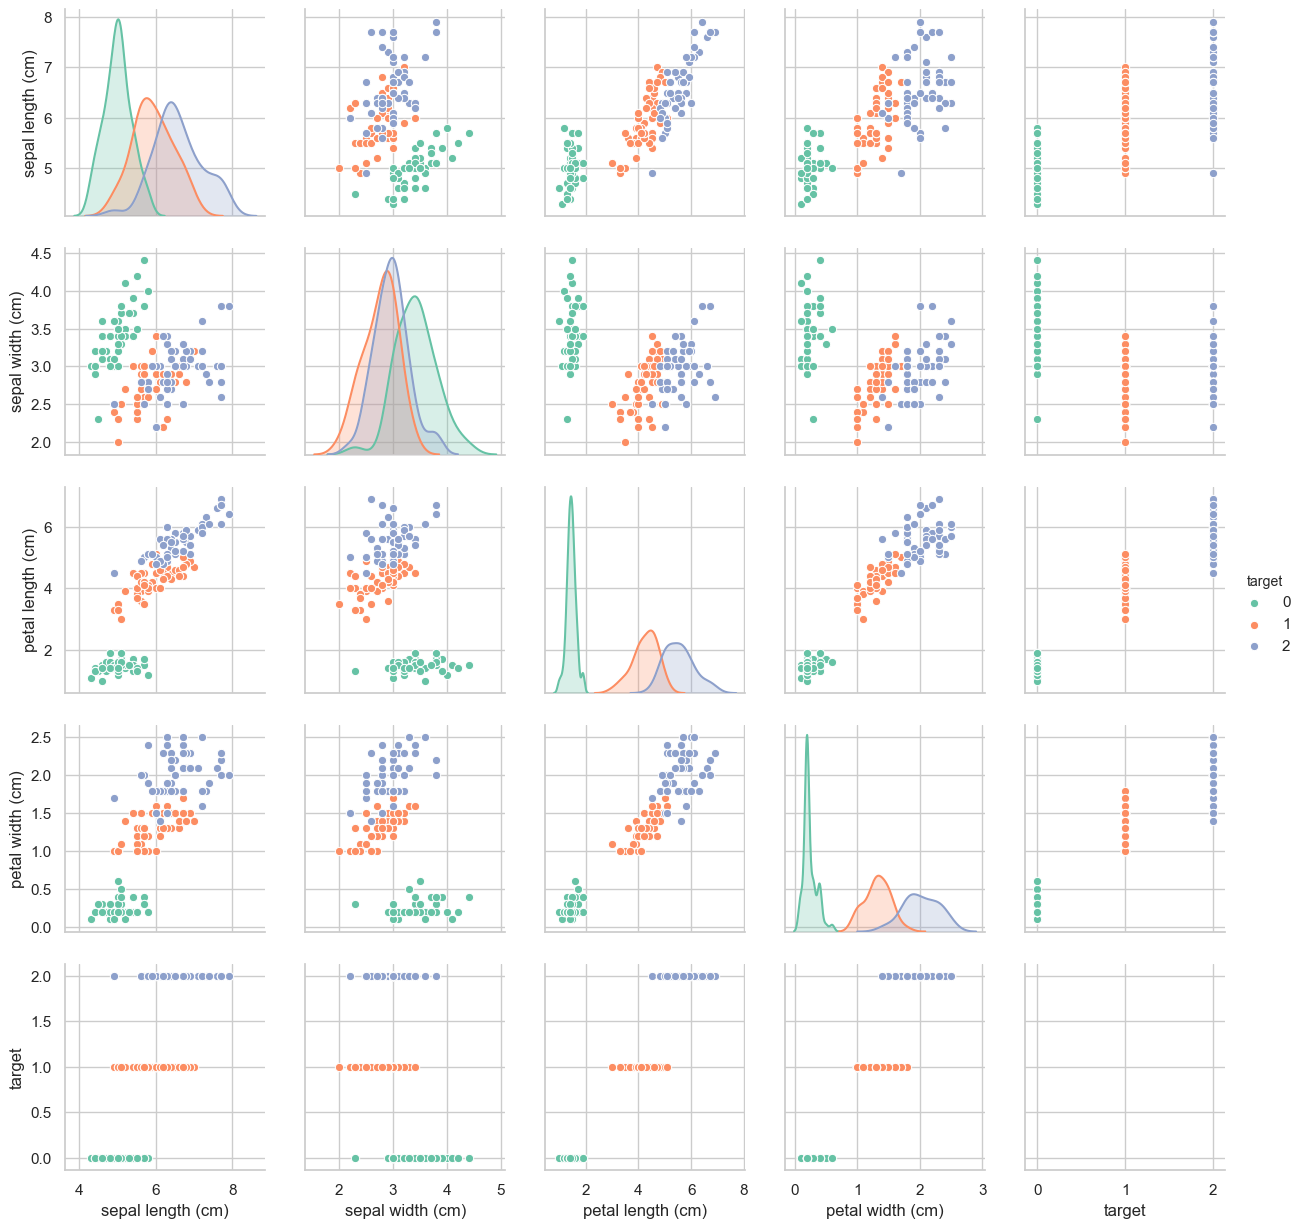

In [55]:
#全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
fig = sns.pairplot(df, hue="target")

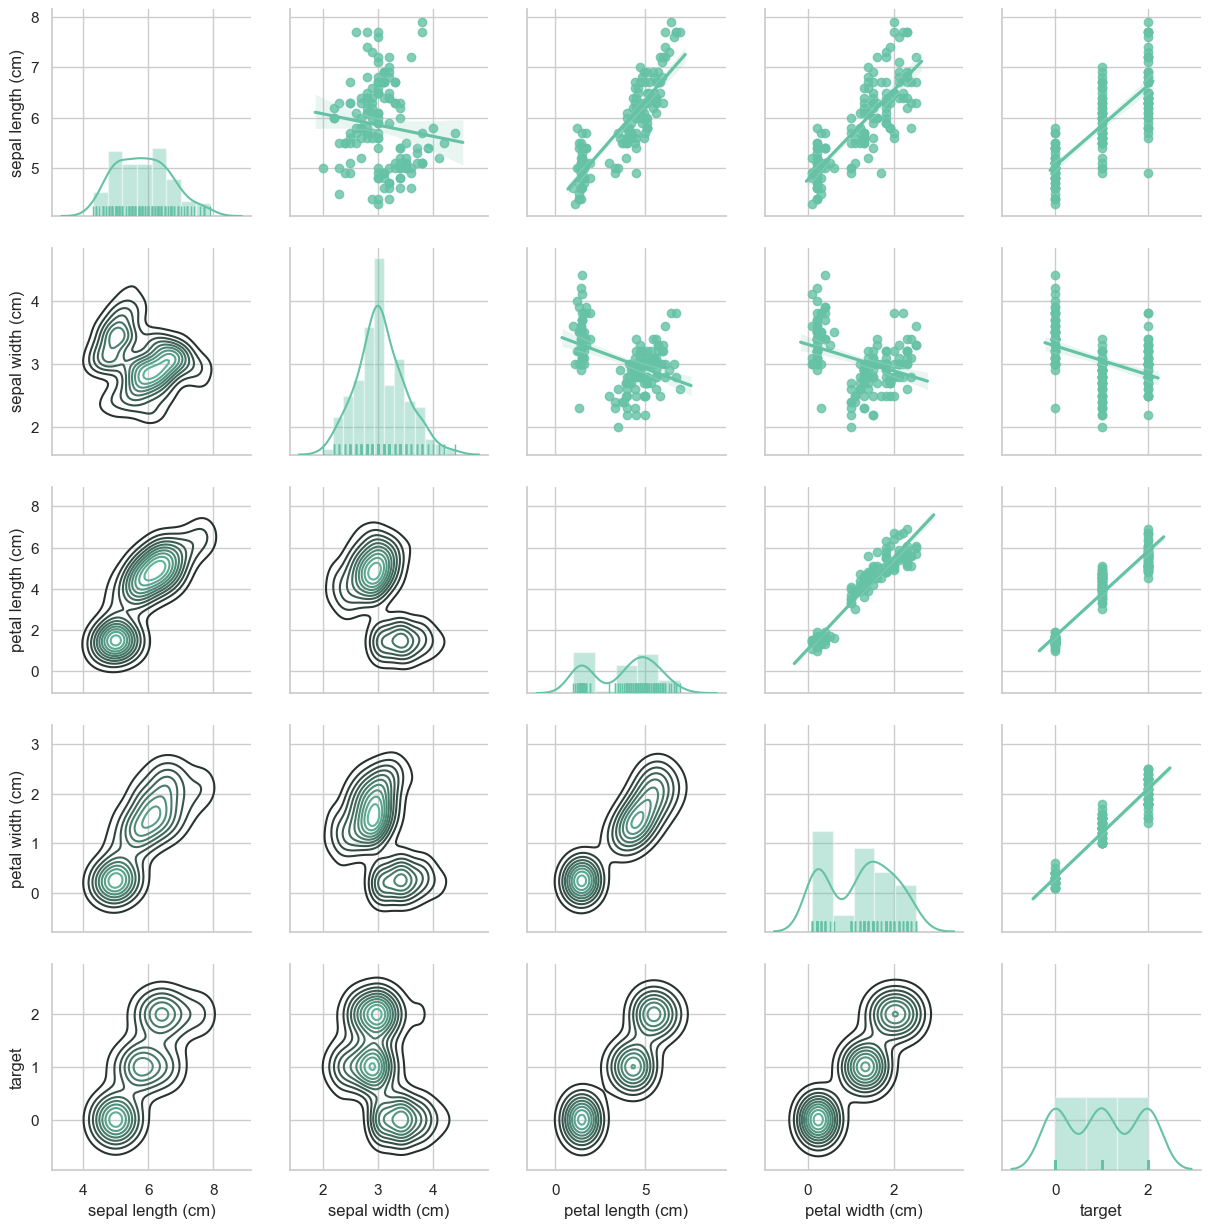

In [26]:
pair_grid = sns.PairGrid(df)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

In [48]:
df_data = df.iloc[ :, 0:4]

In [49]:
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
#４つの特徴量に関する相関係数行列を作る
corr_mat = df_data.corr(method='pearson')
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


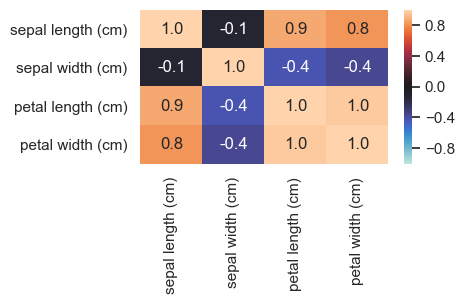

In [70]:
#相関係数行列のヒートマップを作る
fig, ax = plt.subplots(figsize=(4, 2))
sns.heatmap(corr_mat, vmin=-1.0, vmax=1.0, center=0, annot=True, fmt='.1f')
ax.set_ylim(len(corr_mat), 0)
plt.show()

 # 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

回答

・setosaに関しては特にpetal_widthではっきり他の２つとは分かれているのでわかりやすい。

・残りのversicolorおよびvirginicaに関しても多少の重なりはあるがpetal_lengthとpetal_widthにおいてわかりやすく分かれているおり、この２つの特徴量を使えば分けやすい。

・またこの２つの特徴量の正の相関係数が高く、未知のアヤメに対する予測も立てやすい。
